Họ và tên: `Phạm Ngọc Tân`      
MSSV: `19520925`

#Principal component analysis (PCA) exercise#

##Assignment 1: Implement PCA from scratch##

Please implement PCA algorithm with the following guidelines:
- U_k, X_avg, Z = PCA (X, K), where X is the input data matrix (each column is a sample), K is the number of remained components after removing less important components. For the output, Uk is the matrix made by K basis vectors (u_1, u_2, ..., u_k), Z is the output data after removing redundant components. X_avg is the new origin.
- X_reconstruct = decode (U_k, X_avg, X): restore the data (approximately) from U_k, X_avg, Z matrices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

In [2]:
def PCA(X, K):
    # K is the number of new components                                                                            
    # Centering the data by subtracting the mean
    X_mean = np.mean(X, axis = 0)
    X_avg = X - X_mean

    # Calculate the covariance matrix                                       
    covariance_matrix = np.cov(X_avg, rowvar=False)                               
    
    '''
    TODO: Calculate eigenvalues and eigenvectors
    '''
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    '''
    TODO: Sort the eigenvalues in descending order
    '''
    sorted_index = np.argsort(eigen_values)[::-1]  
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    '''
    TODO: Select the new basis and transform the data 
    '''
    U_k = sorted_eigenvectors[:, 0:K]
    Z   = np.dot(U_k.transpose(), X_avg.transpose()).transpose()

    return U_k, X_avg, Z

In [3]:
def decode_PCA(U_k, X_avg, Z):

  #TODO: decode/restore the data before PCA step
#   X_reconstruct = np.dot(U_k, np.transpose(Z)) + X_avg
  X_reconstruct = np.dot(U_k, np.transpose(Z)) + np.transpose(X_avg)

  return X_reconstruct

Create dummy dataset and test the code yourself

Note: X and X_reconstruct MUST have the same shape (Please print out)

In [4]:
# TODO: Create dummy dataset and perform testing
X = np.random.random((5, 5))
num_component = 3

U_k, X_avg, Z = PCA(X, num_component)
X_reconstruct = decode_PCA(U_k, X_avg, Z)
X, X_reconstruct

(array([[0.96133832, 0.74791306, 0.10228582, 0.29811921, 0.20069583],
        [0.97828153, 0.02195582, 0.22782607, 0.99062687, 0.43648623],
        [0.37328697, 0.2695261 , 0.89708748, 0.17411635, 0.56479198],
        [0.2686595 , 0.4449316 , 0.83679937, 0.63027272, 0.73194951],
        [0.36460058, 0.8965873 , 0.47487142, 0.3007676 , 0.74389992]]),
 array([[ 0.74680411,  0.77621252, -0.43354731, -0.63674959, -0.45271973],
        [ 0.5251315 , -0.89514449, -0.4016239 , -0.09357659,  0.86521348],
        [-0.83394072, -0.54322068,  0.7932725 ,  0.61911805, -0.03522915],
        [-0.3819607 ,  1.03867868, -0.5961664 ,  0.26799561, -0.32854719],
        [-0.63539462, -0.22309474,  0.03655207,  0.45099335,  0.37094395]]))

##Assignment 2: PCA for image compression##

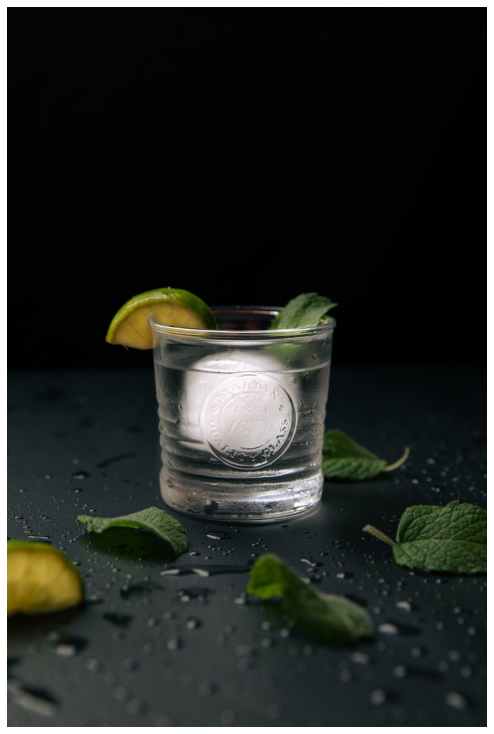

In [5]:
# Download a random online image (RGB) for PCA
# Or you can select your own image (MUST be in RGB format)
req = urllib.request.urlopen('https://images.unsplash.com/photo-1633710317472-c1f19624f3ff?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=774&q=80')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
blue, green, red = cv2.split(img)
original_img = (cv2.merge((red, green, blue, )))
fig = plt.figure(frameon=False)
fig.set_size_inches(10, 10)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(original_img)
plt.savefig('original.jpg')

In [6]:
num_component = 50

''' Split original image into 3 color channels: r,g,b '''
blue, green, red = cv2.split(img)
original_img = (cv2.merge((red, green, blue, )))

''' Normalize data '''
blue, red, green = blue/255, red/255, green/255

In [7]:
# Use scikitlearn's PCA
from sklearn.decomposition import PCA as pca 
pca = pca(num_component)

''' Compress image with PCA '''
blue_compress  = pca.fit(blue)
red_compress   = pca.fit(red)
green_compress = pca.fit(green)

''' Apply PCA into channels '''
blue_compress = pca.transform(blue)
red_compress = pca.transform(red)
green_compress = pca.transform(green)

''' Transform compressed channels into original ones '''
blue_inverse = pca.inverse_transform(blue_compress)
green_inverse = pca.inverse_transform(green_compress)
red_inverse = pca.inverse_transform(red_compress)

''' Merge 3 color channels to transform into the original format '''
img_reduced= (cv2.merge((red_inverse, green_inverse, blue_inverse, )))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


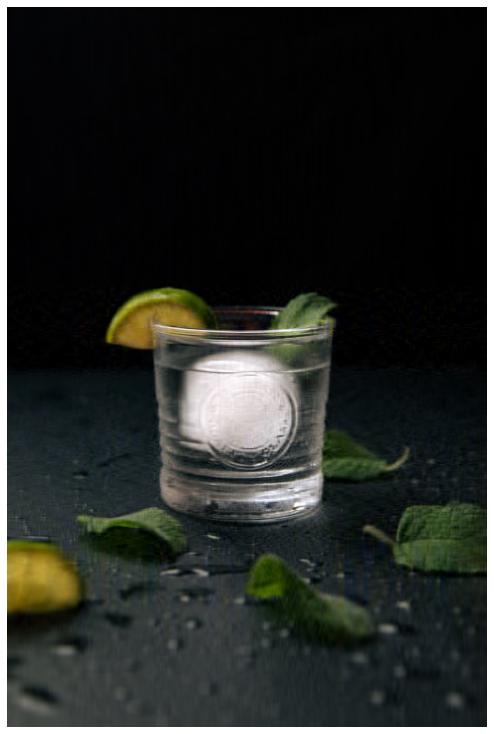

In [8]:
''' This code to save image '''
fig = plt.figure(frameon=False)
fig.set_size_inches(10, 10)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_reduced)
plt.savefig('output.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


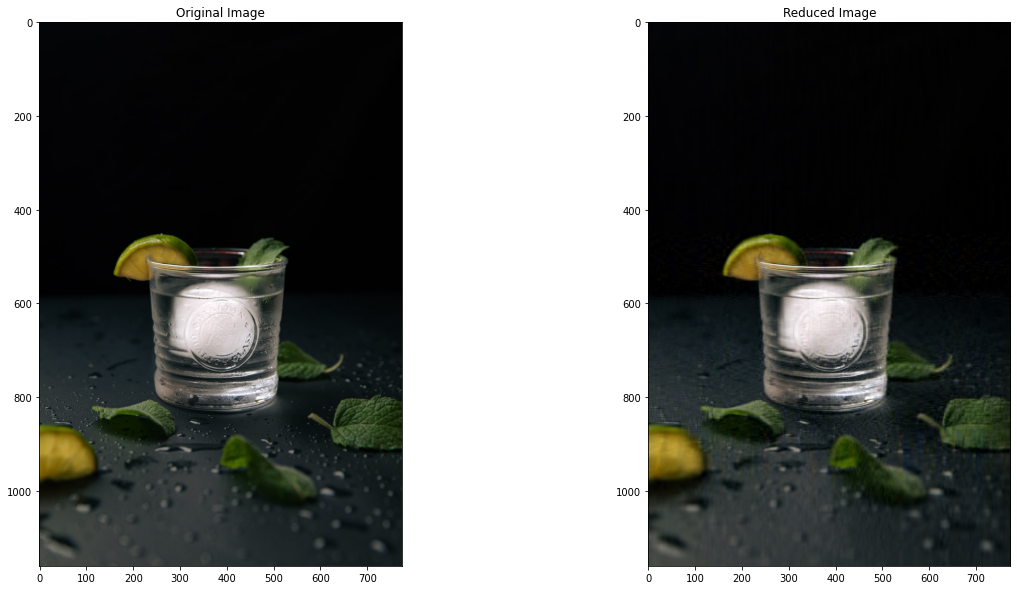

In [9]:
fig = plt.figure(figsize = (20, 10)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(original_img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [10]:
# Use build-from-scratch PCA
blue_compress, red_compress, green_compress = PCA(blue, num_component), PCA(red, num_component), PCA(green, num_component)
blue_inverse = decode_PCA(blue_compress[0], blue_compress[1], blue_compress[2]) 
green_inverse = decode_PCA(green_compress[0], green_compress[1], green_compress[2])
red_inverse = decode_PCA(red_compress[0], red_compress[1], red_compress[2])

img_reduced= (cv2.merge((red_inverse, green_inverse, blue_inverse, )))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


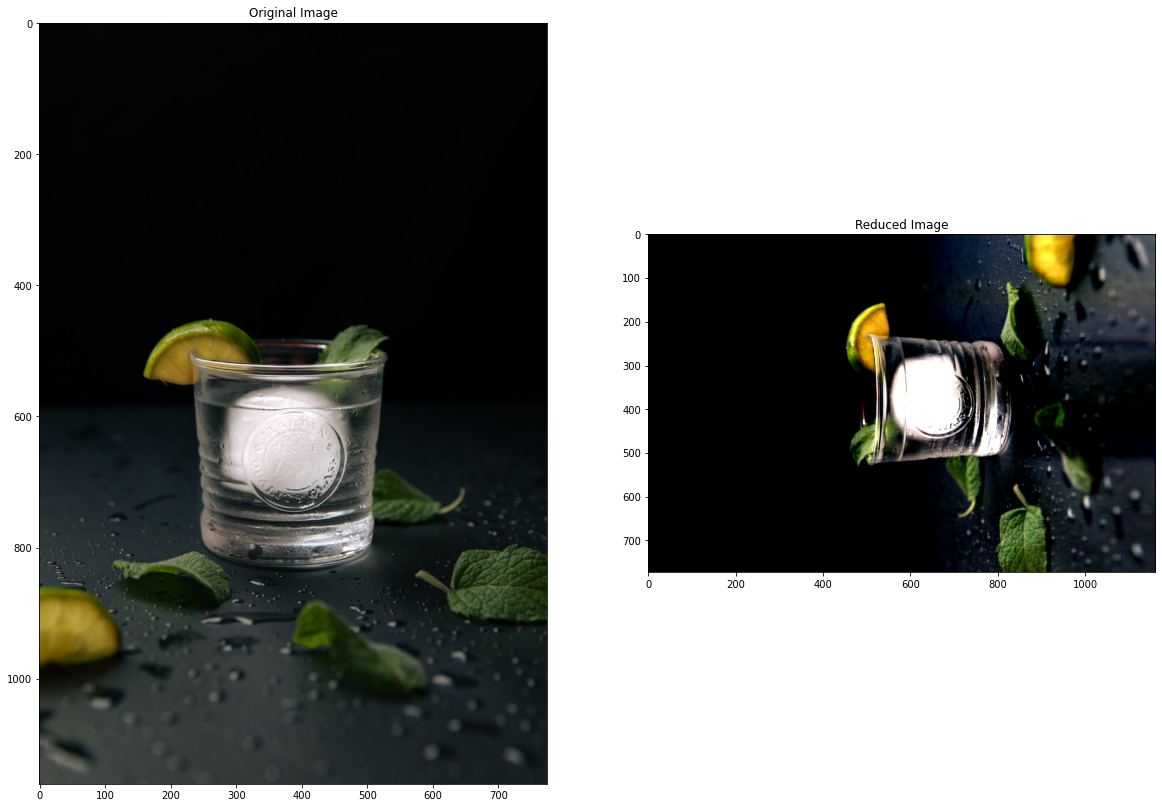

In [11]:
fig = plt.figure(figsize = (20, 20)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(original_img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

##Assignment 3: PCA for sound compression##


In [12]:
# Download a random online WAV sound file
# Save the file with name "test.wav"
!wget -O test.wav https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav

--2021-10-09 07:59:30--  https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav
Resolving file-examples-com.github.io (file-examples-com.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to file-examples-com.github.io (file-examples-com.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073218 (1.0M) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>]   1.02M  --.-KB/s    in 0.05s   

2021-10-09 07:59:30 (21.0 MB/s) - ‘test.wav’ saved [1073218/1073218]



In [18]:
import numpy as np
from scipy.io.wavfile import read, write
from IPython.display import Audio
# Read the WAV file
samplerate, WAV = read("test.wav")
display(Audio('test.wav', autoplay=False))
# TODO: Perform sound compression using functions given in Assignment 1
num_component = 10
WAV_compress  = PCA(WAV, num_component)
WAV_inverse = np.transpose(decode_PCA(WAV_compress[0], WAV_compress[1], WAV_compress[2]))

# TODO: Save the compressed sound file with name "result.wav"
# Hint: Using scipy library
WAV_inverse = np.asarray(WAV_inverse)
write('result.wav', samplerate, WAV_inverse.astype(np.int16))
display(Audio('result.wav', autoplay=False))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


##To do:##
Please write down your comments on PCA for image and sound compression

###Your answer goes here:###
1. PCA cho ảnh: có thể nén được ảnh và có thể giải nén cho ra ảnh ban đầu với chất lượng tỉ lệ thuận với số components mình giữ; tuy nhiên khi sử dụng PCA cho ảnh có chiều rộng > chiều dài thì sẽ xảy ra hiện tượng ảnh khi in ra sẽ bị xoay 1 góc 45 độ
2. PCA cho âm thanh: có thể nén được âm thanh giống như khi thực hiện với ảnh. Nếu khi nén ảnh, một số chi tiết sẽ bị mất đi hoặc bị mờ thì với dữ liệu âm thanh cũng xảy ra tình trạng tương tự với một vài nốt sẽ bị mất và thay vào đó là tiếng rè.